In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data

In [80]:
data = pd.read_csv('LOANPREDICTION.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### We have 12 independent variables and 1 target variable, i.e,  Loan_Status

In [82]:
data.shape

(614, 13)

In [83]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Vizualing the data
Let's visualize each variable separately. Different types of variables are Categorical, ordinal, and numerical.

**Categorical features**: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

**Ordinal features**: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

**Numerical features**: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

## Independent Variable (Categorical)

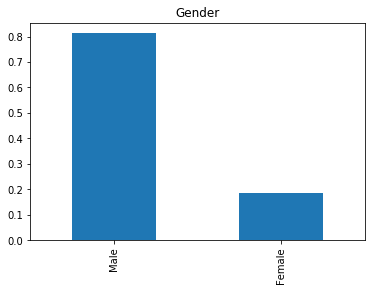

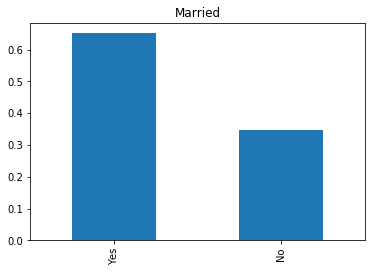

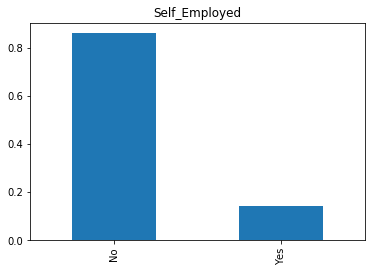

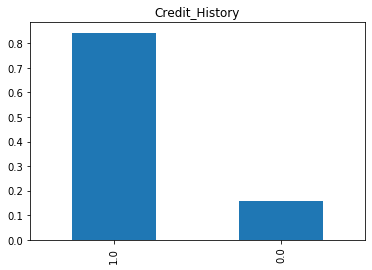

In [84]:
data['Gender'].value_counts(normalize=True).plot.bar(title="Gender")
plt.show()

data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

**It can be inferred from the above bar plots that:**

>80% of applicants in the dataset are male.

>Around 65% of the applicants in the dataset are married.

>Around 15% of applicants in the dataset are self-employed.

>Around 85% of applicants have repaid their debts.

## Independent Variable (Ordinal)

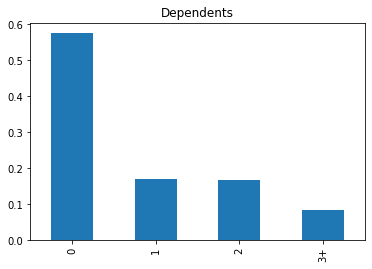

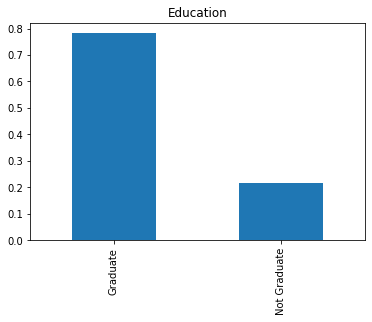

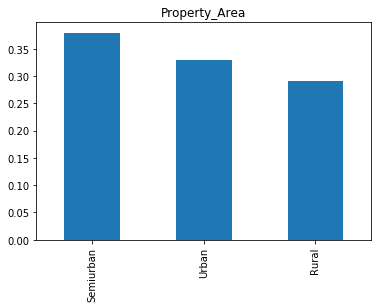

In [85]:
data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()

data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

**The following inferences can be made from the above bar plots:**

>Most of the applicants don't have any dependents.

>Around 80% of the applicants are Graduate.

>Most of the applicants are from the Semiurban area.

## Independent Variable (Numerical)

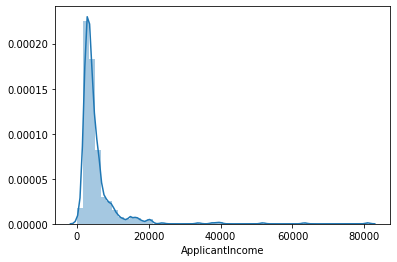

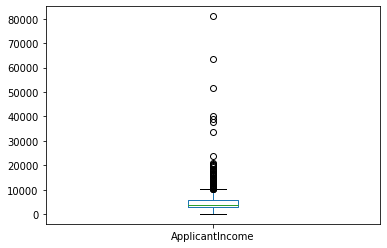

In [86]:
sns.distplot(data['ApplicantIncome'])
plt.show()

data['ApplicantIncome'].plot.box()
plt.show()

>It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed

>The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education.

Text(0.5, 0.98, '')

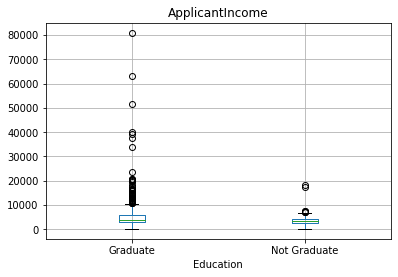

In [87]:
data.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

>We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

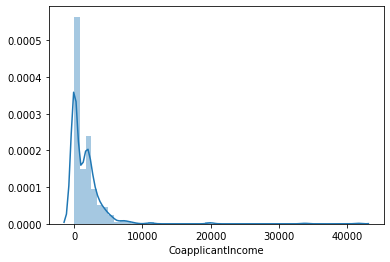

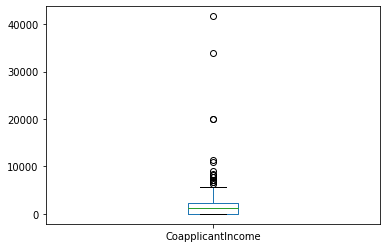

In [88]:
sns.distplot(data['CoapplicantIncome'])
plt.show()
data['CoapplicantIncome'].plot.box()
plt.show()

>We see a similar distribution as that of the applicant's income. 
The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

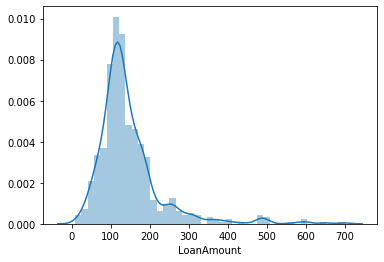

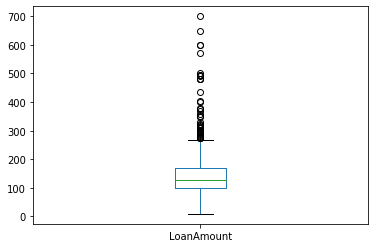

In [89]:
data.notna() #Return a boolean same-sized object indicating if the values are not NA. 
sns.distplot(data['LoanAmount'])
plt.show()
data['LoanAmount'].plot.box()
plt.show()

>We see a lot of outliers in this variable and the distribution is fairly normal.

### Bivariate Analysis

Some of the hypotheses that we generated earlier:
>Applicants with high incomes should have more chances of loan approval.

>Applicants who have repaid their previous debts should have higher chances of loan approval.

>Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.

>Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.
Let’s try to test the above-mentioned hypotheses using bivariate analysis.

In [90]:
#combining the independent variables (Categorical, ordinal) into a single DataFrame 'categorical_col' 
#and creating a seperate DataFrame for independent variable (Numerical) as 'numerical_col'

data=data.drop(columns=['Loan_ID']) #Dropping Loan_ID

categorical_cols=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term',
                  'Credit_History','Property_Area']

numerical_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount']

print('Categorical_Cols= ',categorical_cols)
print('Numerical_Cols= ',numerical_cols)

Categorical_Cols=  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Numerical_Cols=  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


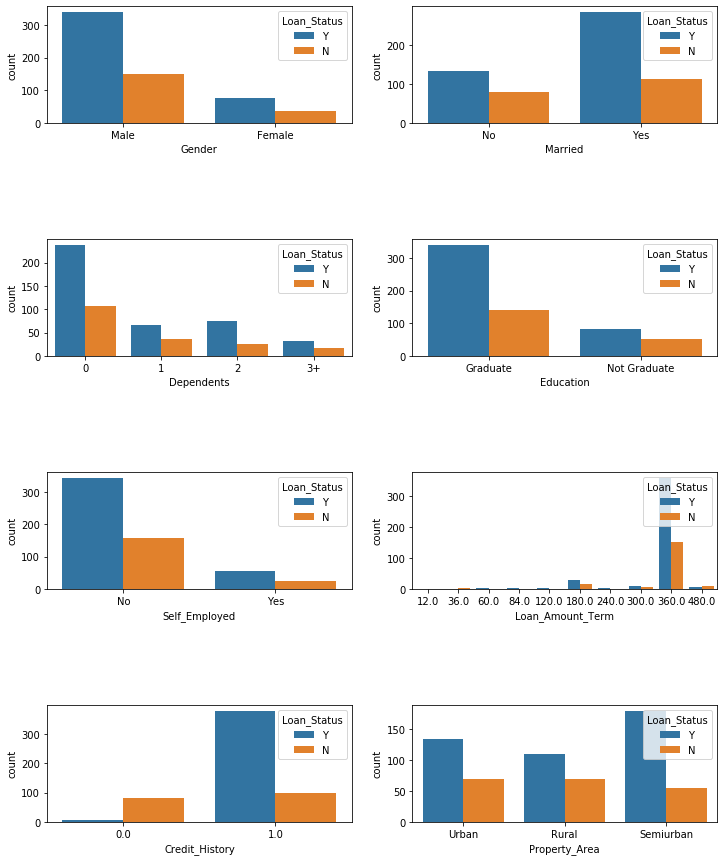

In [91]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for indx,cat_col in enumerate(categorical_cols):
    row,col = indx//2,indx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

The Above plots convey the following points:
>**Loan Approval Status**: About 2/3rd of applicants have been granted loan.

>**Sex**: There are more Men than Women

>**Martial Status**: 2/3rd of the population in the dataset is Married; Married applicants are more likely to be granted loans.

>**Dependents**: Majority of the population have zero dependents and are also likely to accepted for loan.

>**Education**: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval

>**Employment**: 5/6th of population is not self employed.

>**Property Area**: More applicants from Semi-urban and also likely to be granted loans.

>Applicant with credit history are far more likely to be accepted.

>**Loan Amount Term**: Majority of the loans taken are for 360 Months (30 years).

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


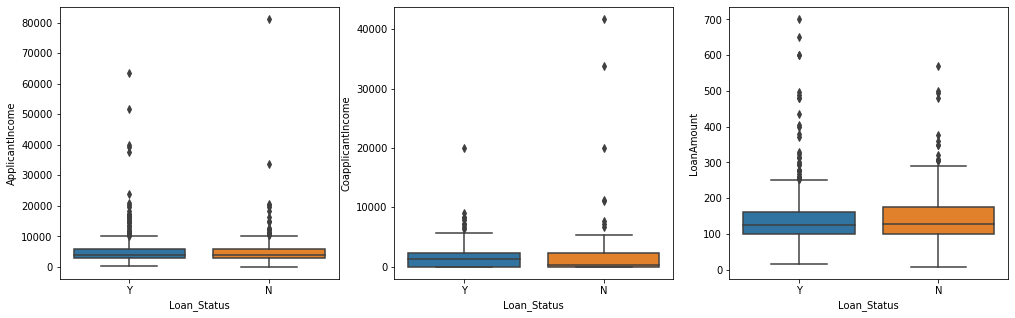

In [92]:
#Analyzing Numerical cols
fig,axes = plt.subplots(1,3,figsize=(17,5))
for indx,cat_col in enumerate(numerical_cols):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[indx])

print(data[numerical_cols].describe())
plt.subplots_adjust(hspace=1)

From the numerical_cols analysis there is no significant relation to Loan Approval Status.

## Preprocessing Data:

Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

1. Encoding Categorical Features.
2. Imputing missing values

In [93]:
# Encoding Categorical features
# Here, we are using Dummy Encoding to preprocess our data

data_encoded = pd.get_dummies(data=data,drop_first=True)
data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [94]:
#### Split features and target variable ####
X = data_encoded.drop(columns=['Loan_Status_Y'])
y = data_encoded['Loan_Status_Y']

### Test Train Data ###
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)


In [95]:
#Imputing missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

### Builiding Model using Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

In [97]:
model = LogisticRegression()

In [98]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred = model.predict(X_test_imp)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0]


In [102]:
evaluation = f1_score(y_test,y_pred)
evaluation

0.903225806451613

In [103]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix: ")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix: 


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123
